Phase 0: Setup

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split

# Load dataset

In [2]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Phase 1: EDA & Data Quality Report

In [3]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29264 entries, 0 to 29263
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           29264 non-null  object 
 1   is_canceled                     29264 non-null  int64  
 2   lead_time                       29264 non-null  int64  
 3   arrival_date_year               29264 non-null  int64  
 4   arrival_date_month              29264 non-null  object 
 5   arrival_date_week_number        29264 non-null  int64  
 6   arrival_date_day_of_month       29264 non-null  int64  
 7   stays_in_weekend_nights         29264 non-null  int64  
 8   stays_in_week_nights            29264 non-null  int64  
 9   adults                          29264 non-null  int64  
 10  children                        29264 non-null  int64  
 11  babies                          29264 non-null  int64  
 12  meal                            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,29264,29264.000000,29264.000000,29264.000000,29264,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,...,29264,23221.000000,2351.000000,29264.000000,29264,29264.000000,29264.000000,29264.000000,29264,29264
unique,1,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,904
top,Resort Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-09
freq,29264,NaN,NaN,NaN,3840,NaN,NaN,NaN,NaN,NaN,...,27412,NaN,NaN,NaN,22533,NaN,NaN,NaN,18152,145
mean,NaN,0.379716,98.071453,2015.878144,NaN,28.171918,15.723141,1.199289,3.159069,1.875239,...,NaN,214.380345,224.101234,0.597048,NaN,95.116157,0.122403,0.560689,NaN,NaN
std,NaN,0.485324,99.541516,0.656899,NaN,13.364027,8.854226,1.144869,2.448000,0.768567,...,NaN,84.038022,114.949902,7.910657,NaN,60.679642,0.335179,0.781501,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,13.000000,2015.000000,NaN,17.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,208.000000,135.000000,0.000000,NaN,50.400000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,65.000000,2016.000000,NaN,30.000000,16.000000,1.000000,3.000000,2.000000,...,NaN,240.000000,223.000000,0.000000,NaN,76.000000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,163.000000,2016.000000,NaN,39.000000,23.000000,2.000000,5.000000,2.000000,...,NaN,242.000000,291.500000,0.000000,NaN,126.600000,0.000000,1.000000,NaN,NaN


# Missing values visualization

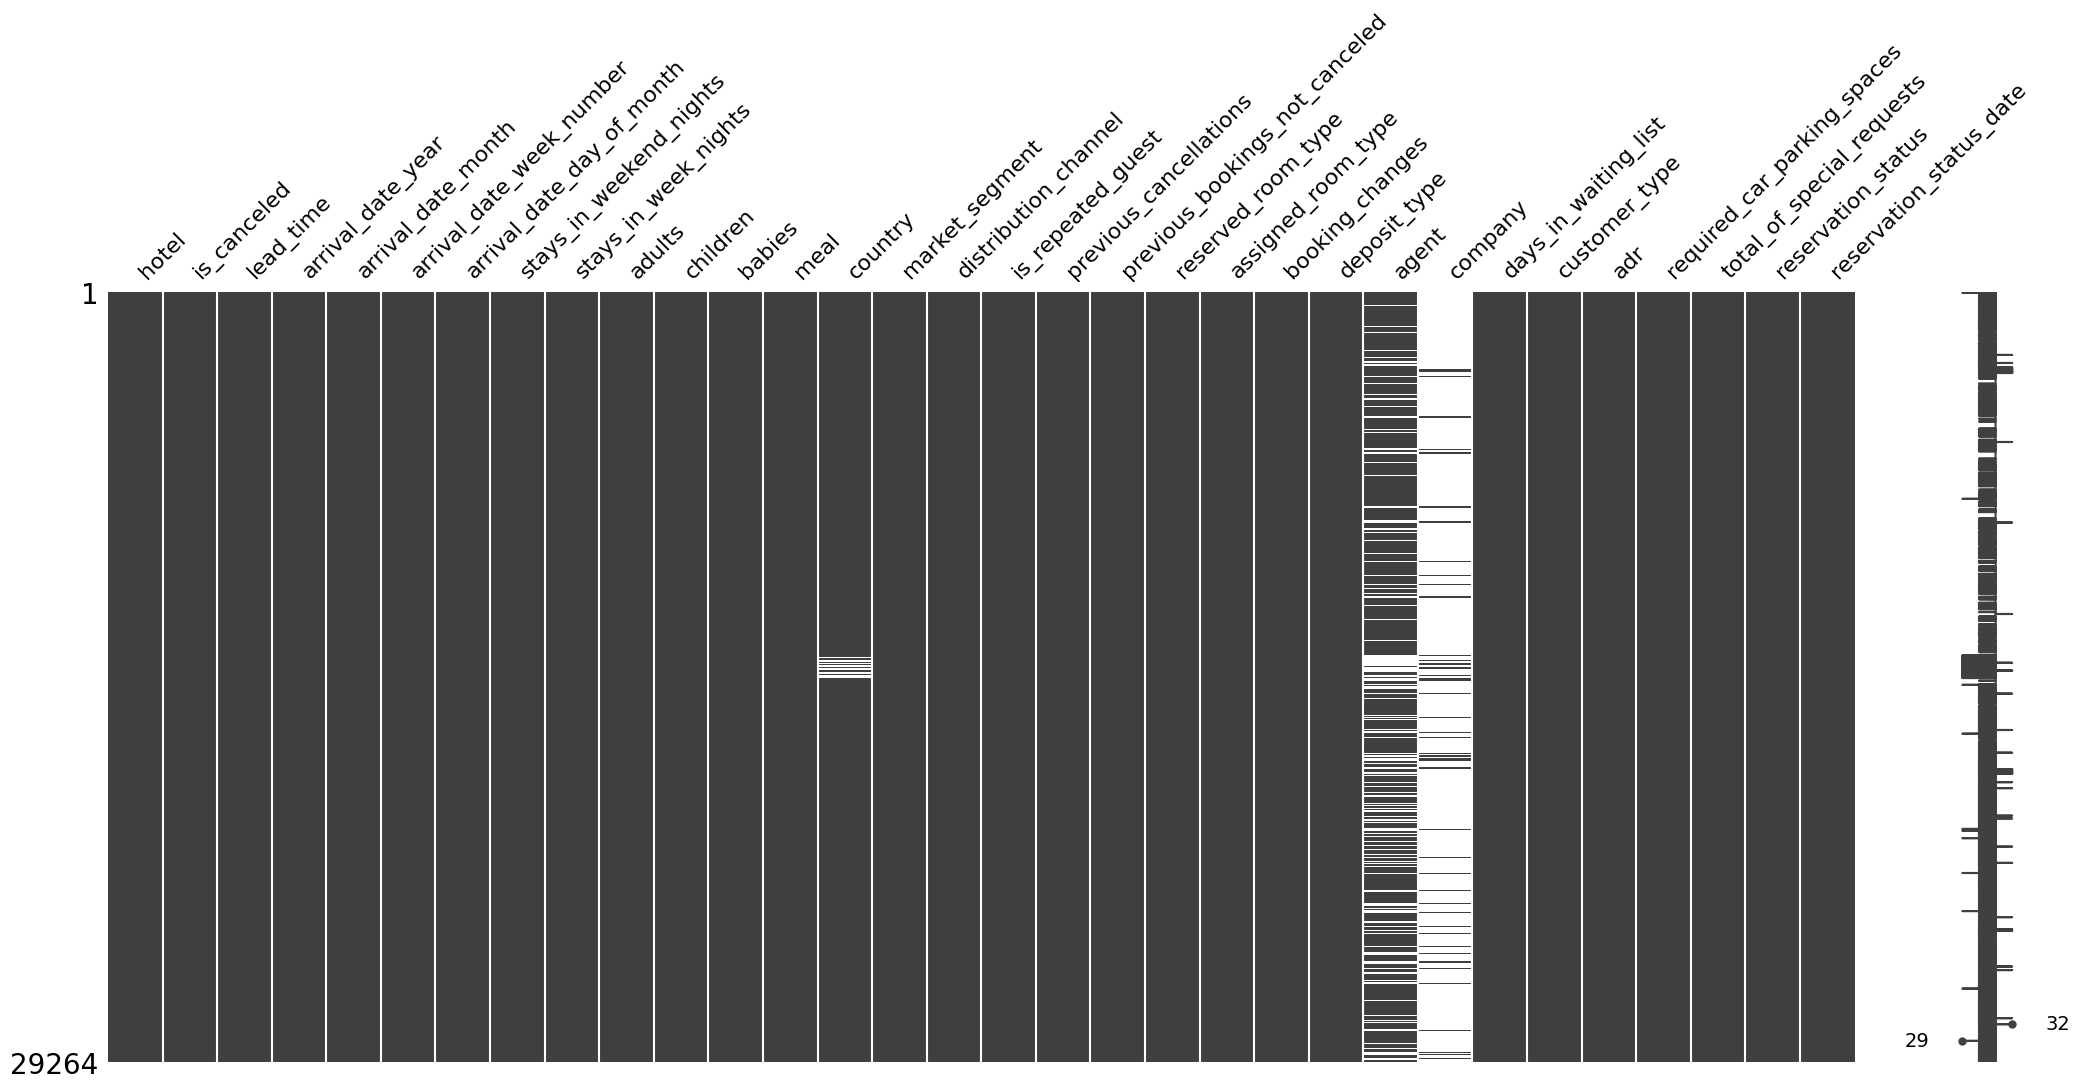

In [4]:
msno.matrix(df)
plt.show()

# Heatmap for missing data

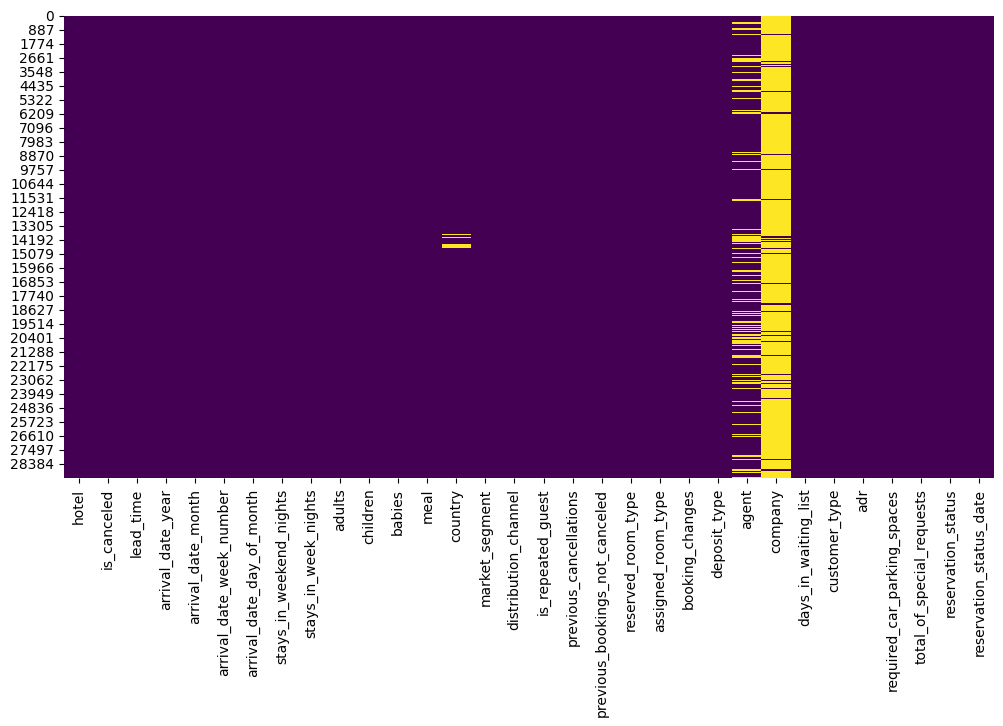

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()


# Outliers detection (adr, lead_time)

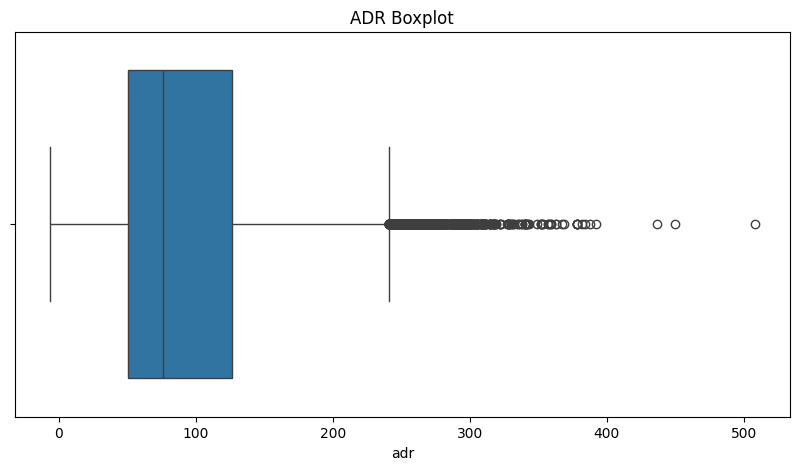

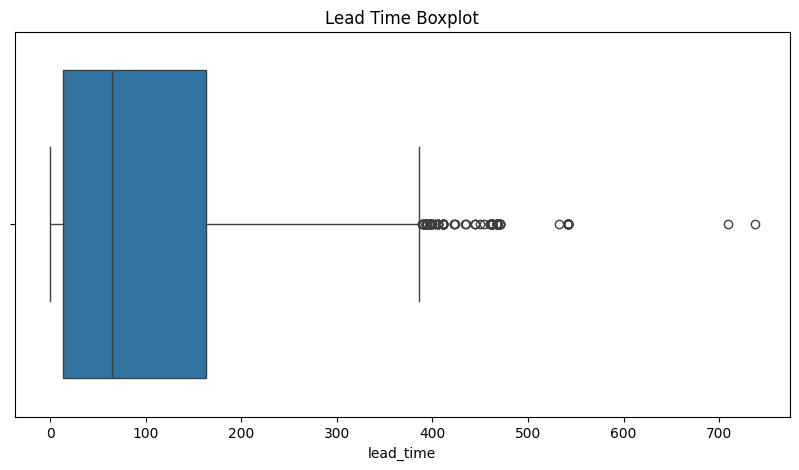

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["adr"])
plt.title("ADR Boxplot")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df["lead_time"])
plt.title("Lead Time Boxplot")
plt.show()

# Handle missing values

In [8]:
df["company"].fillna(0, inplace=True)
df["agent"].fillna(0, inplace=True)
df["country"].fillna(df["country"].mode()[0], inplace=True)
df["children"].fillna(df["children"].median(), inplace=True)


/tmp/ipython-input-1733941062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["company"].fillna(0, inplace=True)
/tmp/ipython-input-1733941062.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

Remove duplicates

In [9]:
df.drop_duplicates(inplace=True)
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 24239 entries, 0 to 29263
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           24239 non-null  object 
 1   is_canceled                     24239 non-null  int64  
 2   lead_time                       24239 non-null  int64  
 3   arrival_date_year               24239 non-null  int64  
 4   arrival_date_month              24239 non-null  object 
 5   arrival_date_week_number        24239 non-null  int64  
 6   arrival_date_day_of_month       24239 non-null  int64  
 7   stays_in_weekend_nights         24239 non-null  int64  
 8   stays_in_week_nights            24239 non-null  int64  
 9   adults                          24239 non-null  int64  
 10  children                        24239 non-null  int64  
 11  babies                          24239 non-null  int64  
 12  meal                            24239

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,24239,24239.000000,24239.00000,24239.000000,24239,24239.000000,24239.000000,24239.000000,24239.000000,24239.000000,...,24239,24239.000000,24239.000000,24239.000000,24239,24239.000000,24239.000000,24239.00000,24239,24239
unique,1,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,904
top,Resort Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-11-15
freq,24239,NaN,NaN,NaN,3645,NaN,NaN,NaN,NaN,NaN,...,23961,NaN,NaN,NaN,19907,NaN,NaN,NaN,16272,108
mean,NaN,0.328685,86.20698,2015.884690,NaN,28.149676,15.804819,1.226866,3.218037,1.880688,...,NaN,173.342341,16.941210,0.302405,NaN,99.809229,0.146169,0.62581,NaN,NaN
std,NaN,0.469745,93.03574,0.655252,NaN,13.139177,8.858087,1.161720,2.485079,0.826648,...,NaN,110.664518,66.902811,5.781701,NaN,63.370862,0.361594,0.80051,NaN,NaN
min,NaN,0.000000,0.00000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,0.000000,0.000000,NaN,-6.380000,0.000000,0.00000,NaN,NaN
25%,NaN,0.000000,9.00000,2015.000000,NaN,18.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,40.000000,0.000000,0.000000,NaN,52.000000,0.000000,0.00000,NaN,NaN
50%,NaN,0.000000,51.00000,2016.000000,NaN,30.000000,16.000000,1.000000,3.000000,2.000000,...,NaN,240.000000,0.000000,0.000000,NaN,80.030000,0.000000,0.00000,NaN,NaN
75%,NaN,1.000000,143.00000,2016.000000,NaN,38.000000,23.000000,2.000000,5.000000,2.000000,...,NaN,240.000000,0.000000,0.000000,NaN,135.900000,0.000000,1.00000,NaN,NaN


Handle outliers (Cap adr)

In [10]:
df.loc[df["adr"] > 1000, "adr"] = 1000

In [13]:
df["reservation_status_date"] = pd.to_datetime(
    df["reservation_status_date"],
    format="mixed",
    errors="coerce"
)

print(df["reservation_status_date"].dtypes)
print(df["reservation_status_date"].head())

datetime64[ns]
0   2015-07-01
1   2015-07-01
2   2015-07-02
3   2015-07-02
4   2015-07-03
Name: reservation_status_date, dtype: datetime64[ns]


# Phase 3: Feature Engineering & Preprocessing

In [14]:
# Create new features
df["total_guests"] = df["adults"] + df["children"] + df["babies"]
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df["is_family"] = np.where((df["children"] + df["babies"]) > 0, 1, 0)


Drop leakage columns

In [15]:
df.drop(["reservation_status", "reservation_status_date"], axis=1, inplace=True)

Encode categorical variables

In [16]:
low_cardinality = ["meal", "market_segment", "distribution_channel"]
df = pd.get_dummies(df, columns=low_cardinality, drop_first=True)

Frequency encoding for 'country'

In [17]:
country_counts = df["country"].value_counts()
df["country_encoded"] = df["country"].map(country_counts)
df.drop("country", axis=1, inplace=True)

Final split

In [20]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (19391, 42)
Test shape: (4848, 42)
